In [15]:
#Imported some stuff. 
import numpy as np
from astropy.io import fits, ascii
from astropy.table import Table, join

import random
import math

from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=69.6, Om0=0.286)

t = Table()
t['flux_lir'] = []
t['flux_xray'] = []
t['redshift'] = [] #redshifts peak at 1, die down either way like bell curve
t['dist'] = [] #distance at each redshift


for i in range(1000):
    t.add_row()
    t[i]['flux_lir'] = random.uniform(0, 1)
    t[i]['flux_xray'] = random.uniform(0, 1)
    t[i]['redshift'] = random.gauss(2, math.sqrt(0.5))
    t[i]['dist'] = t[i]['redshift'] * 299792.46 / 71

t.sort('redshift')

#tbl_sorted['dist'] = cosmo.angular_diameter_distance(tbl_sorted['redshift'])
t.write('flux_random.txt', format='ascii.latex', overwrite=True)
t

flux_lir,flux_xray,redshift,dist
float64,float64,float64,float64
0.784262830536,0.475298771214,-0.000789639044972,-3.33419481414
0.469459461595,0.429240529827,0.0595612460023,251.493133235
0.258240913127,0.918941323309,0.11228738382,474.125507356
0.588655503206,0.332797530388,0.133554987257,563.926453172
0.723212973013,0.687785671082,0.221847362259,936.734739103
0.375910661766,0.600114323114,0.225685175674,952.939633813
0.860226022064,0.559311091088,0.251066447565,1060.11025266
0.50761821925,0.242142109697,0.272767016167,1151.73936315
0.217032327965,0.965644368143,0.355833234438,1502.48057327


/Users/vsong/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10
/Users/vsong/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10


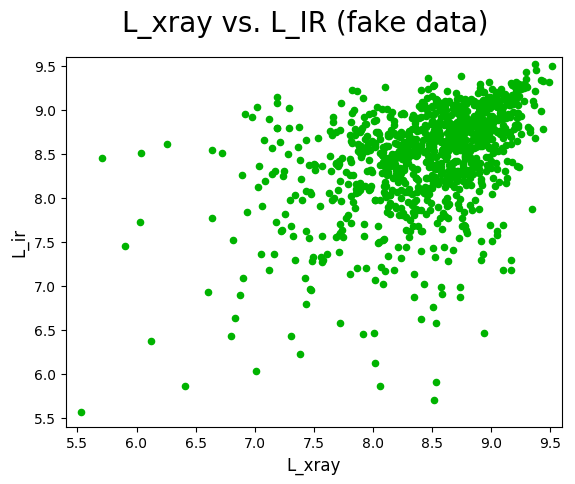

In [23]:
#------------Flux graph-----------
#import stuff
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
from astropy.table import Table, join
import numpy as np
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc")
%matplotlib inline
import math

fig = plt.figure()
fig.suptitle('L_xray vs. L_IR (fake data)', fontsize=20)

#-------Add data to the plots------
t = ascii.read('flux_random.txt')

plt.xlabel("L_xray", fontsize=12)
plt.ylabel("L_ir", fontsize=12)
plt.scatter(np.log10(t['flux_xray']) + np.log10(4*math.pi) + 2*np.log10(t['dist']), 
            np.log10(t['flux_lir']) + np.log10(4*math.pi) + 2*np.log10(t['dist']),
            s=20,facecolor=(0,0.7,0))
plt.xlim(5.4,9.6)
plt.ylim(5.4,9.6)
fig.savefig('flux_random.png', dpi=300, bbox_inches='tight')

(0, 5)

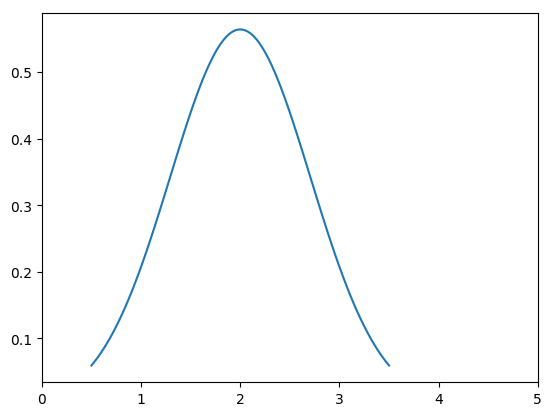

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 2
variance = 0.5
sigma = math.sqrt(variance)
x = np.linspace(mu-3*variance,mu+3*variance, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

plt.xlim(0,5)